In [9]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading csv file
filepath = "Auto.csv"
auto = pd.read_csv(filepath, na_values=["?"]).dropna()
auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
auto1 = auto[["cylinders","displacement","horsepower","weight","acceleration","year","origin"]]
auto1[:5]

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [4]:
auto1.corr()*100

,cylinders,displacement,horsepower,weight,acceleration,year,origin
cylinders,100.000000,95.082330,84.298336,89.752734,-50.468338,-34.564744,-56.893159
displacement,95.082330,100.000000,89.725700,93.299440,-54.380050,-36.985521,-61.453511
horsepower,84.298336,89.725700,100.000000,86.453774,-68.919551,-41.636148,-45.517145
weight,89.752734,93.299440,86.453774,100.000000,-41.683920,-30.911988,-58.500535
acceleration,-50.468338,-54.380050,-68.919551,-41.683920,100.000000,29.031611,21.274581
year,-34.564744,-36.985521,-41.636148,-30.911988,29.031611,100.000000,18.152772
origin,-56.893159,-61.453511,-45.517145,-58.500535,21.274581,18.152772,100.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


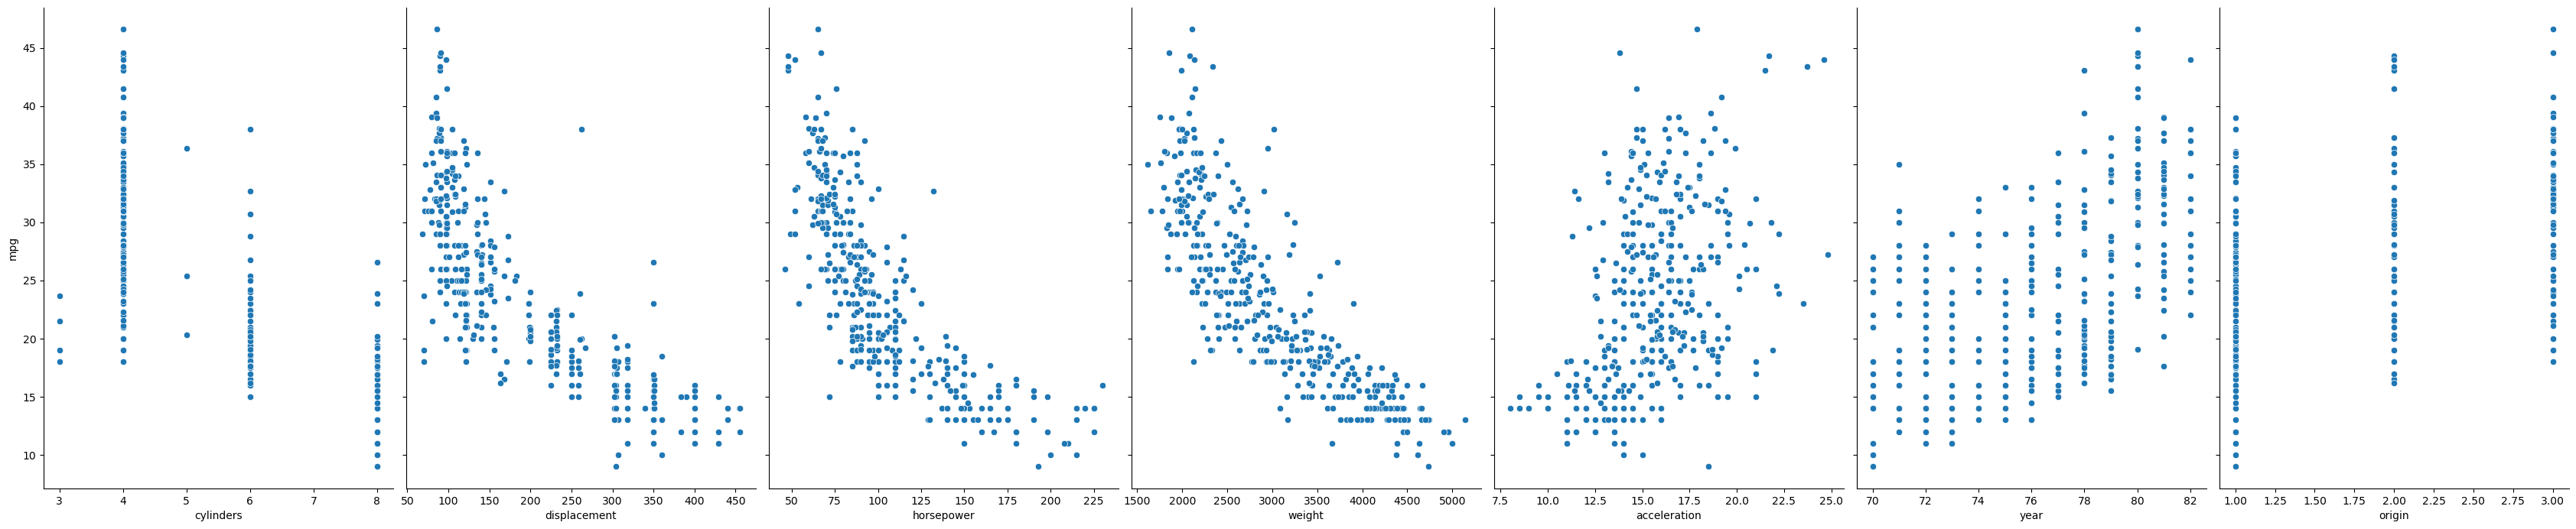

In [5]:
#Linearity
p = sns.pairplot(auto, x_vars=["cylinders","displacement","horsepower","weight","acceleration","year","origin"], y_vars="mpg", height=7, aspect=0.7)

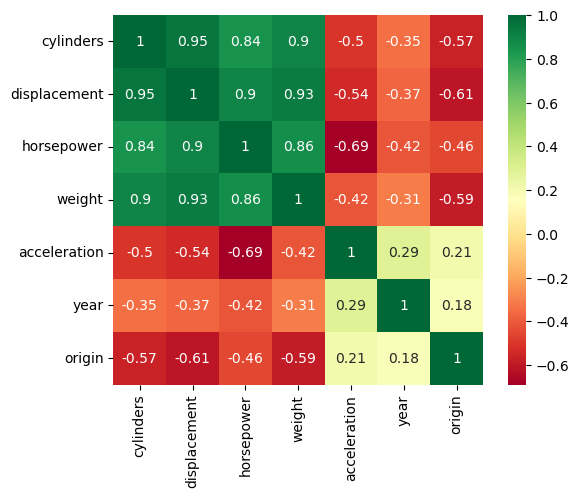

In [6]:
#VISUALIZING CORR MATRIX USING HEATMAP
p=sns.heatmap(auto1.corr(), annot=True,cmap='RdYlGn',square=True) 

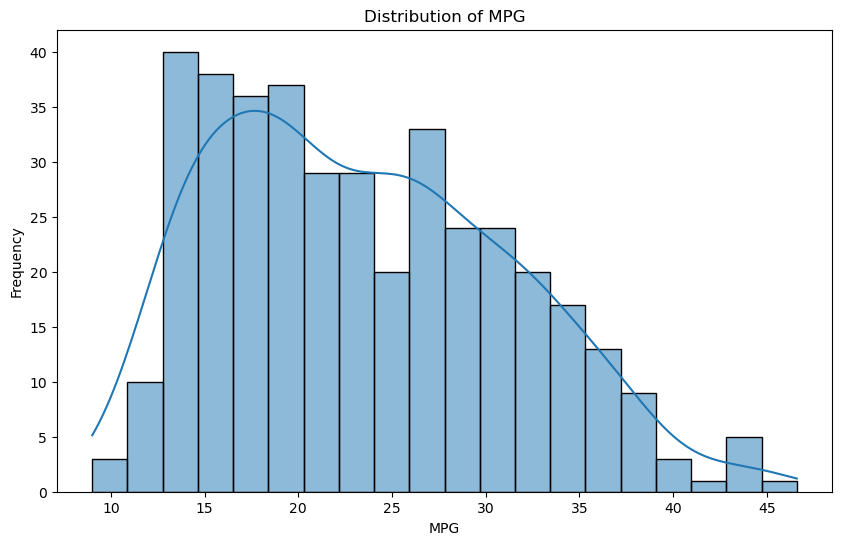

In [11]:
#Distribution of Continuous Variables
# Histogram for `mpg`
plt.figure(figsize=(10, 6))
sns.histplot(auto['mpg'], bins=20, kde=True)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

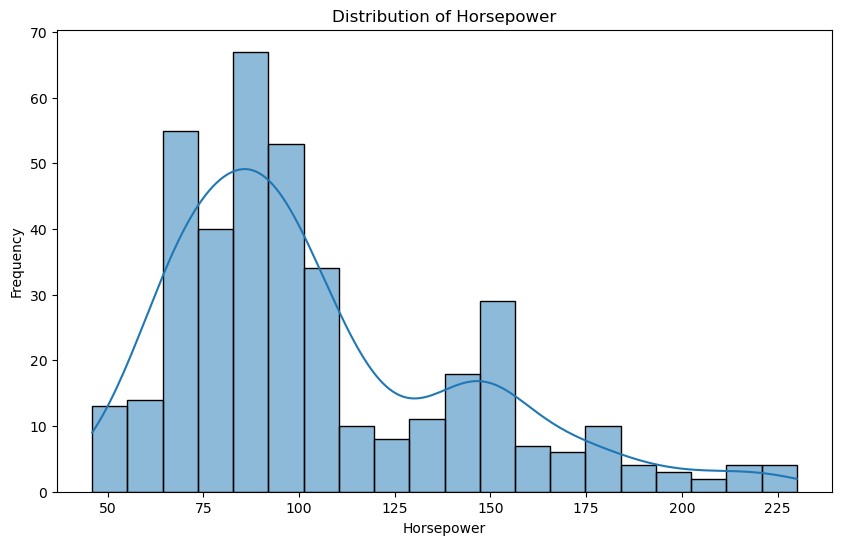

In [12]:
# Histogram for `horsepower`
plt.figure(figsize=(10, 6))
sns.histplot(auto1['horsepower'], bins=20, kde=True)
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()

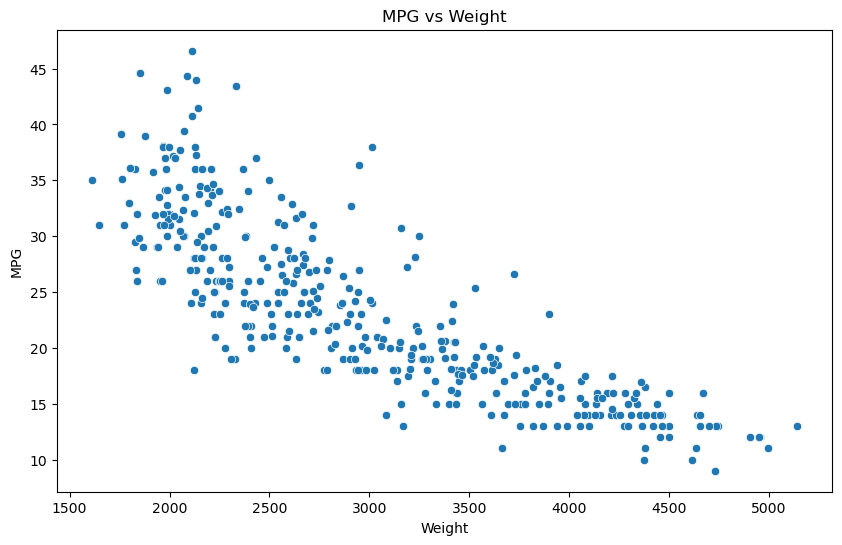

In [13]:
#Scatter Plots to Examine Relationships
# `mpg` vs `weight`
plt.figure(figsize=(10, 6))
sns.scatterplot(data=auto, x='weight', y='mpg')
plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

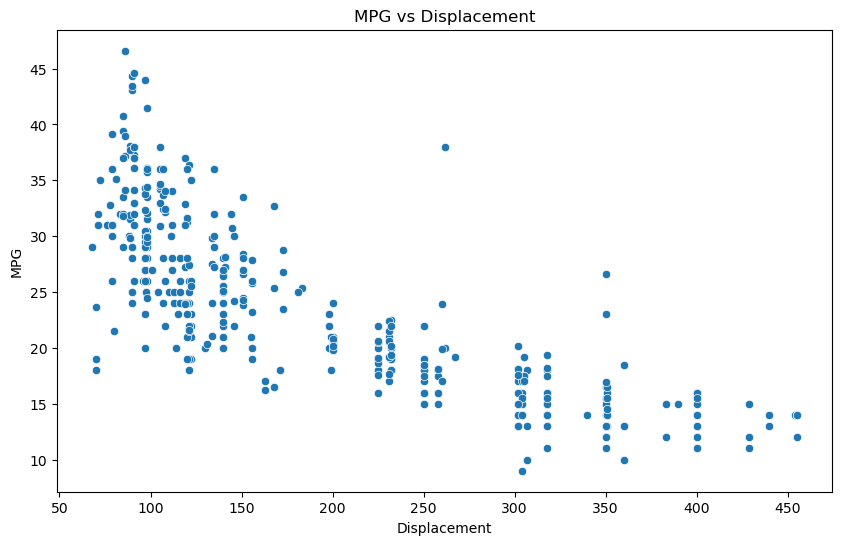

In [14]:
# `mpg` vs `displacement`
plt.figure(figsize=(10, 6))
sns.scatterplot(data=auto, x='displacement', y='mpg')
plt.title('MPG vs Displacement')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

In [15]:
#Analysis by Categorical Variables
# Frequency of Cylinders
print("\nCylinders Frequency:")
print(auto['cylinders'].value_counts())

# Average MPG by Number of Cylinders
avg_mpg_by_cylinders = auto.groupby('cylinders')['mpg'].mean()
print("\nAverage MPG by Cylinders:")
print(avg_mpg_by_cylinders)


Cylinders Frequency:
cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

Average MPG by Cylinders:
cylinders
3    20.550000
4    29.283920
5    27.366667
6    19.973494
8    14.963107
Name: mpg, dtype: float64


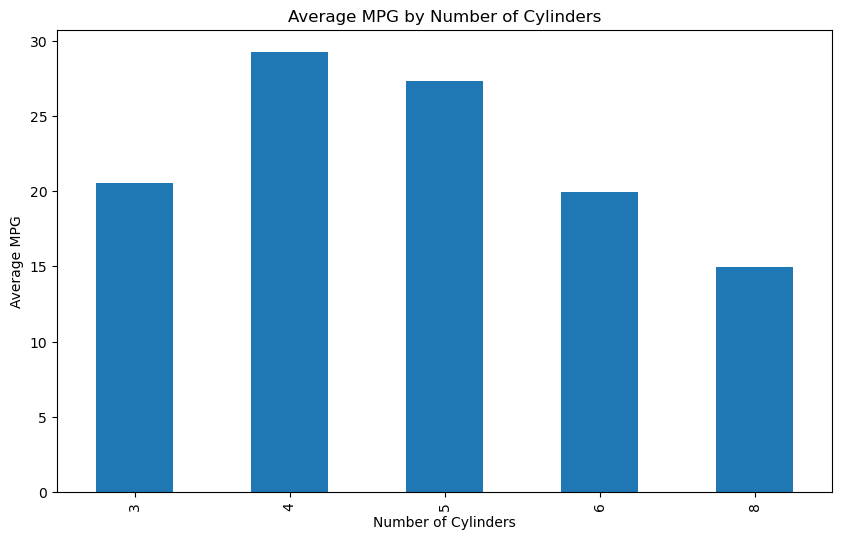

In [16]:
# Bar Plot for Average MPG by Cylinders
plt.figure(figsize=(10, 6))
avg_mpg_by_cylinders.plot(kind='bar')
plt.title('Average MPG by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average MPG')
plt.show()

In [17]:
# Frequency of Origin
print("\nOrigin Frequency:")
print(auto['origin'].value_counts())

# Average MPG by Origin
avg_mpg_by_origin = auto.groupby('origin')['mpg'].mean()
print("\nAverage MPG by Origin:")
print(avg_mpg_by_origin)


Origin Frequency:
origin
1    245
3     79
2     68
Name: count, dtype: int64

Average MPG by Origin:
origin
1    20.033469
2    27.602941
3    30.450633
Name: mpg, dtype: float64


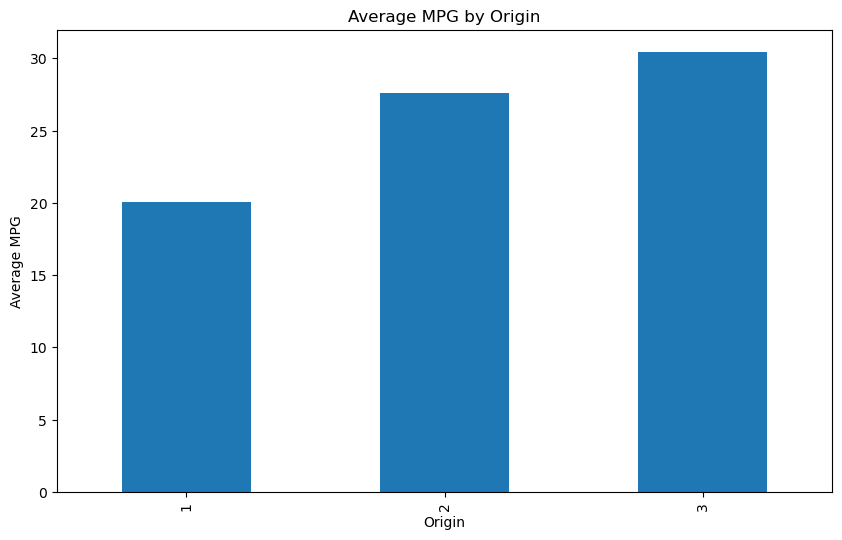

In [18]:
# Bar Plot for Average MPG by Origin
plt.figure(figsize=(10, 6))
avg_mpg_by_origin.plot(kind='bar')
plt.title('Average MPG by Origin')
plt.xlabel('Origin')
plt.ylabel('Average MPG')
plt.show()

In [19]:
#To compare the means of mpg between two groups (e.g., cars with different numbers of cylinders):
from scipy import stats

# Example: T-test between cars with 4 cylinders and 6 cylinders
group1 = auto[auto['cylinders'] == 4]['mpg']
group2 = auto[auto['cylinders'] == 6]['mpg']

t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"T-test result: t-statistic = {t_stat}, p-value = {p_val}")

if p_val < 0.05:
    print("The difference in means is statistically significant.")
else:
    print("The difference in means is not statistically significant.")


T-test result: t-statistic = 13.704896898546142, p-value = 4.617651634899658e-33
The difference in means is statistically significant.


In [20]:
#To compare the means of mpg across more than two groups (e.g., different numbers of cylinders)
# Perform ANOVA
anova_result = stats.f_oneway(*[auto[auto['cylinders'] == x]['mpg'] for x in auto['cylinders'].unique()])
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("At least one group mean is significantly different from the others.")
else:
    print("No significant difference between group means.")


ANOVA result: F-statistic = 172.95462925955226, p-value = 8.78554105526514e-85
At least one group mean is significantly different from the others.
